# Using machine learning to predict heart disease


In [1]:
#Importing all the tools we need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#model from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score #for spliting data
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report # for model evaluation
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve


## Loading the heart disease dataset

In [2]:
Data_frame = pd.read_csv('heart-disease.csv')
Data_frame.shape

(303, 14)

### Applying some EDA method

In [3]:
Data_frame.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#target - have disease or not (1=yes, 0=no)
Data_frame['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

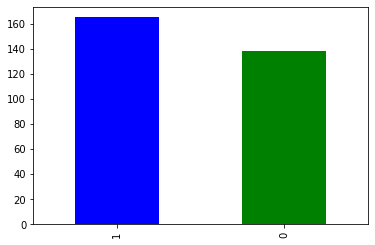

In [5]:
Data_frame['target'].value_counts().plot(kind='bar',color =['blue','green']);

It is clear from the above bar graph that there are more people with heart disease in our dataset. 

In [6]:
#Let's look for missing value in our dataset
Data_frame.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
Data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Dataset is clean already so nothing need to be changed

### Let's look for Heart disease frequency against various features

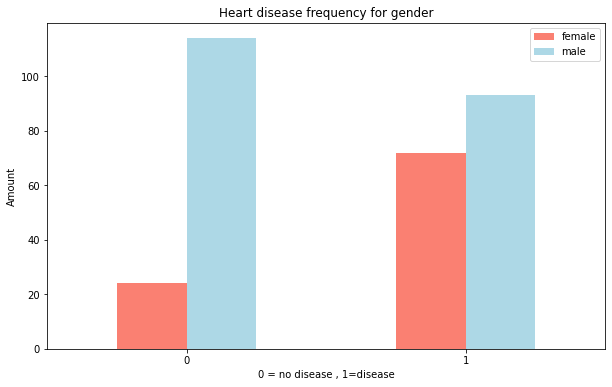

In [8]:
pd.crosstab(Data_frame.target,Data_frame.sex).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['salmon','lightblue'])
plt.title('Heart disease frequency for gender')
plt.xlabel('0 = no disease , 1=disease')
plt.ylabel('Amount')
plt.legend(['female','male'])
plt.xticks(rotation=0);

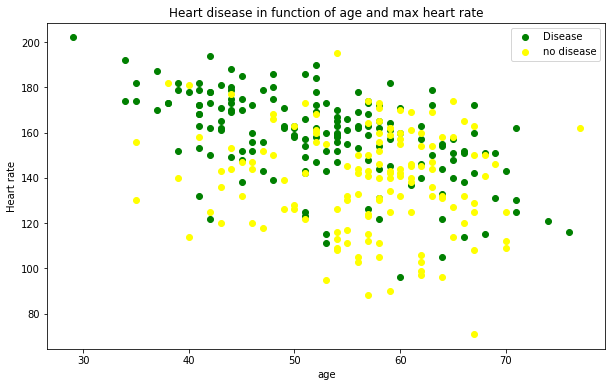

In [9]:
plt.figure(figsize = (10,6))

#scatter wiith positive examples
plt.scatter(Data_frame.age[Data_frame.target==1],
           Data_frame.thalach[Data_frame.target==1],
           c='green')

#scatter with negative examples
plt.scatter(Data_frame.age[Data_frame.target==0],
           Data_frame.thalach[Data_frame.target==0],
           c='yellow')


plt.title('Heart disease in function of age and max heart rate')
plt.xlabel('age')
plt.ylabel('Heart rate')
plt.legend(['Disease','no disease']);

 cp - chest pain type
  * 0: Typical angina: chest pain related decrease blood supply to the heart
  * 1: Atypical angina: chest pain not related to heart
  * 2: Non-anginal pain: typically esophageal spasms (non heart related)
  * 3: Asymptomatic: chest pain not showing signs of disease

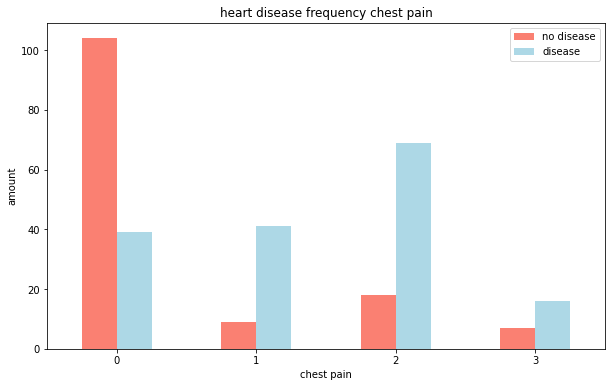

In [10]:
pd.crosstab(Data_frame.cp,Data_frame.target).plot(kind='bar',figsize=(10,6),
                                 color = ['salmon','lightblue'])

plt.title('heart disease frequency chest pain')
plt.xlabel('chest pain')
plt.ylabel('amount')
plt.legend(['no disease','disease'])
plt.xticks(rotation=0);

###### All Done so let's start training our model
will be importing logistic_regression and Randomforestclassifier model from scikit-learn

In [11]:
#splting the target variable from data
X = Data_frame.drop('target',axis=1)
Y = Data_frame['target']

np.random.seed(0)

#spliting the data into train and test
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [12]:
#Let's first fit logistic regression model
logistic_model = LogisticRegression()

logistic_model.fit(X_train,Y_train)

/home/akm/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
print(f'Train score logistic_model:- {logistic_model.score(X_train,Y_train)}')
print(f'Test score logistic_model:- {logistic_model.score(X_test,Y_test)}')

Train score logistic_model:- 0.8429752066115702
Test score logistic_model:- 0.8524590163934426


In [14]:
#Fit the data to RandomForestClassifier model and see the result
Random_model = RandomForestClassifier()

Random_model.fit(X_train,Y_train)

RandomForestClassifier()

In [15]:
print(f'Train score Random_model:- {Random_model.score(X_train,Y_train)}')
print(f'Test score Random_model:- {Random_model.score(X_test,Y_test)}')

Train score Random_model:- 1.0
Test score Random_model:- 0.8524590163934426


### Hyperparameter Tuning
let's try different parameter to our model to get more accuracy

In [16]:
# Create a hyperparameter grid for logistics regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

#Tune LogisticsRegression
np.random.seed(42)

#Setup random Hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose=True)

#Fit random hyoerparameter search model for Logisticregression()
rs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [17]:
# check the accuracy best param
print(f'Train score logistic_model:- {rs_log_reg.score(X_train,Y_train)}')
print(f'Test score logistic_model:- {rs_log_reg.score(X_test,Y_test)}')
rs_log_reg.best_params_

Train score logistic_model:- 0.8429752066115702
Test score logistic_model:- 0.8524590163934426


{'solver': 'liblinear', 'C': 1.623776739188721}

In [18]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth": [None,3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

#Now we have tuned LogisticRegression ,Let,s do the same for RandomForestClassifier
np.random.seed(42)

rs_random_class = RandomizedSearchCV(RandomForestClassifier(),
                                    param_distributions = rf_grid,
                                    cv=5,
                                    n_iter = 20,
                                    verbose = True)

#fit random Hyperparameter search model for RandomForestClassifier
rs_random_class.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [19]:
# check the accuracy best param
print(f'Train score Random_model:- {rs_random_class.score(X_train,Y_train)}')
print(f'Test score Random_model:- {rs_random_class.score(X_test,Y_test)}')
rs_random_class.best_params_

Train score Random_model:- 0.8636363636363636
Test score Random_model:- 0.8524590163934426


{'n_estimators': 260,
 'min_samples_split': 8,
 'min_samples_leaf': 19,
 'max_depth': None}